<center>

# Food Data and Preference Analysis: 

    Exploring the different nutritional values found in common food items.
    Exploring food preferences of people from various ages and ethnicity.
</center>
 


# 1)  Aims, objectives and background

### 1.1 Introduction

<p>
Food is any substance consumed to provide nutritional support and energy to an organism. It can be raw, processed or formulated and is consumed orally by animals for growth, health or pleasure. Food is mainly composed of water, lipids, proteins and carbohydrates. 
    Food has been one of the main necessities of mankind since the beginning of history.Good nutrition is when you get the right amount of nutrients (from healthy food) in the right combinations. On the other hand, it also studies the relationship between diseases and malnutrition and the role that food plays in the development of chronic disease for example diabetes, obesity or cancer. Food preferences are a primary determinant of dietary intake and behaviors, and they persist from early childhood into later life. As such, establishing preferences for healthy foods from a young age is a promising approach to improving diet quality, a leading contributor to cardiometabolic health.
</p>

### 1.2 Aims and objectives

<p> 
The aim of this project is to explore the differences and the similarities in nutritional value of common dishes people consume.
I am also aiming to find about the different food preferences of people from various nationalities and ages.
    <br>
   
<p>  
Here are my objectives:
    <br> 
   
    
#### Differences between types of dishes:
    
<ul>
    <li>What is different nutritional value in each dish? (calories, fats, proteins, etc)</li>
    <li>How does the main nutrients in the different categories of food dishes differ?</li>
 
</ul>
    


#### Similarities between types of dishes:
<ul>
    <li>What are the universal nutrition that all the food dishes have? Do they differ from one another?</li>
    <li>What are the levels of main nutrients for a particular category of food dish??</li>
</ul>


#### Preferences of people:
<ul>
    <li>Do people prefer traditional food / western food more?</li>
    <li>What do people generally prefer? Fresh juice ( from juice/ vegetables) or Carbonated Drinks( Coke, Pepsi etc) </li>
</ul>


#### My aims for this project proposal are:

<ol>
    <li>Finding a reliable source to collect data about different nutrients and the nutritional value in common dishes that people consume, as well as analyzing cases of malnutr of people from various ages and nationalities.</li>
    <li>As it’s nearly impossible to collect data about all the common dishes in the world, I would have to focus on food dishes that are popular/people consume more.</li>
    <li>Pre-process the collected data and store it in a well-structured database or dataframe.</li>
    <li>Perform a basic analysis of the data.</li>
</ol>  
</p> 

In [1]:
# import libraries
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd

#import graphing libraries
import plotly.express as px
# import matplotlib.pyplot as plt # this is used for the plot the graph 
# import seaborn as sns # used for plot interactive graph.
import matplotlib.pyplot as plt

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as py
import plotly.graph_objects as go

#import pie charts libraries
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px

import warnings
warnings.simplefilter('ignore')


# First part of Analysis : Exploring the differences and the similarities in nutritional value of common dishes people consume.

In [2]:
nutrients_df = pd.read_csv("nutrients_csvfile.csv")
print (nutrients_df)

                      Food Measure  Grams Calories Protein Fat Sat.Fat Fiber  \
0               Cows' milk   1 qt.    976      660      32  40      36     0   
1                Milk skim   1 qt.    984      360      36   t       t     0   
2               Buttermilk   1 cup    246      127       9   5       4     0   
3    Evaporated, undiluted   1 cup    252      345      16  20      18     0   
4           Fortified milk  6 cups  1,419    1,373      89  42      23   1.4   
..                     ...     ...    ...      ...     ...  ..     ...   ...   
330    Fruit-flavored soda  12 oz.    346      161       0   0       0     0   
331             Ginger ale  12 oz.    346      105       0   0       0     0   
332              Root beer  12 oz.    346      140       0   0       0     0   
333                 Coffee   1 cup    230        3       t   0       0     0   
334                    Tea   1 cup    230        4       0   t       0     0   

    Carbs                   Category  


In [3]:
nutrients_df.to_csv("nutrients.csv") 

In [4]:
nutrients=pd.read_csv("nutrients.csv")
nutrients.head()

,Unnamed: 0,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


In [5]:
nutrients_df.to_csv("nutrients.csv") 

In [6]:
nutrients=nutrients.replace("t",0)
nutrients=nutrients.replace("t'",0)

nutrients.head()

,Unnamed: 0,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,1,Milk skim,1 qt.,984,360,36,0,0,0,52,Dairy products
2,2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


In [7]:
nutrients=nutrients.replace(",","", regex=True)
nutrients['Fiber']=nutrients['Fiber'].replace("a","", regex=True)
nutrients['Calories'][91]=(8+44)

In [8]:
nutrients['Grams']=pd.to_numeric(nutrients['Grams'])
nutrients['Calories']=pd.to_numeric(nutrients['Calories'])
nutrients['Protein']=pd.to_numeric(nutrients['Protein'])
nutrients['Fat']=pd.to_numeric(nutrients['Fat'])
nutrients['Sat.Fat']=pd.to_numeric(nutrients['Sat.Fat'])
nutrients['Fiber']=pd.to_numeric(nutrients['Fiber'])
nutrients['Carbs']=pd.to_numeric(nutrients['Carbs'])

In [9]:
nutrients.dtypes

Unnamed: 0      int64
Food           object
Measure        object
Grams           int64
Calories      float64
Protein         int64
Fat             int64
Sat.Fat       float64
Fiber         float64
Carbs         float64
Category       object
dtype: object

In [10]:
print(nutrients.isnull().any())
print('-'*245)
print(nutrients.describe())
print('-'*245)

Unnamed: 0    False
Food          False
Measure       False
Grams         False
Calories       True
Protein       False
Fat           False
Sat.Fat        True
Fiber          True
Carbs         False
Category      False
dtype: bool
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
       Unnamed: 0        Grams    Calories     Protein         Fat  \
count    335.0000   335.000000   334.00000  335.000000  335.000000   
mean     167.0000   143.211940   188.88024    8.573134    8.540299   
std       96.8504   138.668626   184.38958   17.733722   19.797871   
min        0.0000    11.000000     0.00000   -1.000000    0.000000   
25%       83.5000    60.000000    75.00000    1.000000    0.000000   
50%      167.0000   108.000000   131.00000    3.000000    1.000000   
75%      250.5000   200.000000  

In [11]:
nutrients=nutrients.dropna()
nutrients.shape

(331, 11)

Protein plays an important role in the creation and maintenance of every cell in your body. Protein is a necessary component of any diet because it fuels your cells so you have the energy you need to stay active.

Here are some other important facts about protein:

1) Essential macronutrient, which means you need an adequate amount of protein in your diet to stay healthy

2) Needed to maintain muscle mass

3) Helps with keeping blood sugars stable

4) Maintains hunger

5) Responsible for growth, repair and maintenance of cells – amino acids are the building blocks of protein – they play a major role in hair growth

6) Not getting enough protein in your diet can result in your body utilizing muscle for energy

7) Builds muscle, cartilage and skin

8) Plays a role in hormonal regulation

The graph below shows the top 40 Protein-Rich Foods that people can consume more / add in their diets in order to be more healthy

In [12]:
alls=[ 'Dairy products', 'Fats, Oils, Shortenings', 'Meat, Poultry',' Vegetables A-E',
 'Vegetables R-Z', 'Fruits A-F', 'Fruits G-P', 'Fiber', 'Fish, Seafood','Breads, cereals, fastfood,grains','Seeds and Nuts']

prot= nutrients[nutrients['Category'].isin(alls)]

protein_rich= prot.sort_values(by='Protein', ascending= False)
top_40=protein_rich.head(40)
fig = px.bar(top_40, x='Food', y='Protein', color='Protein', title=' Top 40 Protein-Rich Foods')
fig.show()

Fats are essential to our bodies’ correct functioning, and a deficiency in such nutrients can be counterproductive. In the past few years, several studies have demonstrated that a fat-based diet doesn’t necessarily lead to diabetes, obesity, or CVD; vice versa, it can even help you prevent CVD and lose weight. 

Beneficial effects of Fat:

1) Fats are a great source of energy.

2) Fats are essential for many biological functions

3) Fats promote vitamins absorption

Harmful effects of Fat ( Eating too much Fat)

1) Weight gain and obesity
2) Heart disease and related issues, like high blood pressure , high blood cholesterol levels and triglyceride levels
3) Metabolic syndrome
4) Prediabetes ,Type 2 diabetes
5) Insulin resistance
6) Fatty liver disease
7) Stroke


The graph below shows the top 40 Fat-Rich Foods that people need to take note of so thehy can consume/change their diet accordingly to not eat too much or too less fat-content foods

In [13]:
alls=[ 'Dairy products', 'Fats, Oils, Shortenings', 'Meat, Poultry',' Vegetables A-E',
 'Vegetables R-Z', 'Fruits A-F', 'Fruits G-P', 'Fiber', 'Fish, Seafood','Breads, cereals, fastfood,grains','Seeds and Nuts']

fats= nutrients[nutrients['Category'].isin(alls)]

fats= fats.sort_values(by='Fat', ascending= False)
top_40_fat=fats.head(40)
fig = px.bar(top_40_fat, x='Food', y='Fat', color='Fat', title= 'Top 40 Foods with High Fat Content')
fig.show()

The graph below shows the top 40 Calorie-Rich Foods that people can take note of especially if they are going on a calorie-deficit diet . This allows them to be more mindful and calculative about the number of calories they consume per day.

In [14]:
alls=[ 'Dairy products', 'Fats, Oils, Shortenings', 'Meat, Poultry',' Vegetables A-E',
 'Vegetables R-Z', 'Fruits A-F', 'Fruits G-P', 'Fiber', 'Fish, Seafood','Breads, cereals, fastfood,grains','Seeds and Nuts']

cals= nutrients[nutrients['Category'].isin(alls)]

cals= cals.sort_values(by='Calories', ascending= False)
top_40_cals=cals.head(40)
fig = px.bar(top_40_cals, x='Food', y='Calories', color='Calories', title= 'Top 40 Foods with High Calorie Content')
fig.show()

When we consume carbohydrates, they are digested and absorbed into the small intestine and then supply glucose to the blood. This glucose is either used in tissues for fuel, or is stored as glycogen in the liver and muscles. Excess glucose is converted to fatty acids and stored for long-term storage of energy. 

Benefits of Carbohydrates

1) Boost The Energy
2) Prevent Blood Clots
3) Control Your Weight
4) Maintain Body Composition
5) Fasten Your Recovery From Training
6) Reduced the Risk of Cancer
7) Improve Sleep Quality
8) Reduced the Risk of Diabetes
9) Stored Fuel
10) Provide Various Minerals and release Antioxidant


The graph below shows the top 40 Foods with high level of Carbohydrates which can help people to consume the right level of carbohydrates in their diet

In [15]:
alls=[ 'Dairy products', 'Fats, Oils, Shortenings', 'Meat, Poultry',' Vegetables A-E',
 'Vegetables R-Z', 'Fruits A-F', 'Fruits G-P', 'Fiber', 'Fish, Seafood','Breads, cereals, fastfood,grains','Seeds and Nuts']

carbs= nutrients[nutrients['Category'].isin(alls)]

carbs= carbs.sort_values(by='Carbs', ascending= False)
top_40_carbs=carbs.head(40)
fig = px.bar(top_40_carbs, x='Food', y='Carbs', color='Carbs', title= 'Top 40 Foods with High Amounts of Carbohydrates')
fig.show()

Fiber is a very important carbohydrate that you need in your diet. It’s necessary for healthy digestion, and it provides many other health-related benefits.Fruits and vegetables high in fiber make it easy to meet your recommended daily allowance. Fiber is different from other types of carbohydrates. Where most break down into simple sugars during digestion, it doesn’t. Instead, it passes through your body undigested.There are two types of fiber: soluble and insoluble. Soluble fiber dissolves in water, forming a gel-like substance. Insoluble fiber doesn’t dissolve. It promotes the movement of foods through your digestive system, helping you avoid digestive issues like constipation.

Benefits of consumption of high-fiber diet:

1) Normalizes bowel movements. 
2) Helps maintain bowel health.
3) Lowers cholesterol levels. 
4) Helps control blood sugar levels.
5) Aids in achieving healthy weight. 
6) Even reduced risk of cancer

The graph below shows the top 40 Foods with high fibre content which can help people to refer to if they need to increase or decrease their fibre intake in their diet.

In [16]:
alls=[ 'Dairy products', 'Fats, Oils, Shortenings', 'Meat, Poultry',' Vegetables A-E',
 'Vegetables R-Z', 'Fruits A-F', 'Fruits G-P', 'Fiber','Fish, Seafood','Breads, cereals, fastfood,grains','Seeds and Nuts']

fiber = nutrients[nutrients['Category'].isin(alls)]

fiber = carbs.sort_values(by='Fiber', ascending= False)
top_40_fiber = fiber.head(40)
fig = px.bar(top_40_fiber, x='Food', y='Fiber', color='Fiber', title= 'Top 40 Foods with High Amounts of Fiber')
fig.show()

For the piechart , I created a category_dist function to group all my food products into the different categories and find out which category are present in highest percentage ( % ) for each nutrient.

In [17]:
category_dist=nutrients.groupby(['Category']).sum()
category_dist

,Unnamed: 0,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
Category,,,,,,,,
Breads cereals fastfoodgrains,10845,5253,11921.0,403,207,99.0,115.91,2059.0
Dairy products,378,7412,8434.0,503,396,322.0,4.40,651.0
Desserts sweets,8402,2958,6608.0,78,163,150.0,20.50,1184.0
DrinksAlcohol Beverages,3942,3284,1112.0,0,0,0.0,0.00,167.0
Fats Oils Shortenings,483,695,3629.0,234,631,536.0,234.00,239.0
Fish Seafood,1458,1807,2757.0,588,338,252.0,235.00,263.0
Fruits A-F,3773,3844,3328.0,29,20,12.0,33.50,812.0
Fruits G-P,5502,5412,4054.0,28,25,21.0,21.10,1009.0
Fruits R-Z,1716,1973,1228.0,7,1,0.0,17.40,330.0


In [18]:
category_dist=nutrients.groupby(['Category']).sum()

fig = make_subplots(
    rows=2, cols=3,
    specs=[[{"type": "domain"},{"type": "domain"},{"type": "domain"}],[{"type": "domain"},{"type": "domain"},{"type": "domain"}]])

In [19]:
category_dist=nutrients.groupby(['Category']).sum()

fig = make_subplots(
    rows=2, cols=3,
    specs=[[{"type": "domain"},{"type": "domain"},{"type": "domain"}],[{"type": "domain"},{"type": "domain"},{"type": "domain"}]])

fig.add_trace(go.Pie(values=category_dist['Calories'].values, title='CALORIES', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=5.0))),
              row=1, col=1)

fig.add_trace(go.Pie(values=category_dist['Fat'].values,title='FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=5.0))),
              row=1, col=2)

fig.add_trace(go.Pie(values=category_dist['Protein'].values,title='PROTEIN', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=5.0))),
              row=1, col=3)

fig.add_trace(go.Pie(values=category_dist['Fiber'].values,title='FIBER', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=5.0))),
              row=2, col=1)

fig.add_trace(go.Pie(values=category_dist['Sat.Fat'].values,title='SAT.FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=5.0))),
              row=2, col=2)

fig.add_trace(go.Pie(values=category_dist['Carbs'].values,title='CARBS', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=5.0))),
              row=2, col=3)

fig.update_traces(hole=.4, hoverinfo="label+percent+name") 

fig.update_layout(
    title_text="Nutrients in each Category of Food"),
    
fig.show()

Conclusion : 

1) Bread, Cereals and Fast Food Grains occupy the highest perecentage compared to other categories for Calories and Carbohydrates.

2) Fats,Oils Shortenings ocuupy the highest percentage compared to other categories for Far and Saturated Fats.

3) Fish and Seafood occupy the highest perecentage compared to other categories for both Protein and Fat.


# My second part of analysis is to focus on food preferences of people from various ages and ethnicity

In [20]:
preference_df = pd.read_csv("Food_Preference.csv")

In [21]:
preference_df.head()

,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert
0,2019/05/07 2:59:13 PM GMT+8,FPS001,Male,Indian,24,Traditional food,Fresh Juice,Maybe
1,2019/05/07 2:59:45 PM GMT+8,FPS002,Female,Indian,22,Western Food,Carbonated drinks,Yes
2,2019/05/07 3:00:05 PM GMT+8,FPS003,Male,Indian,31,Western Food,Fresh Juice,Maybe
3,2019/05/07 3:00:11 PM GMT+8,FPS004,Female,Indian,25,Traditional food,Fresh Juice,Maybe
4,2019/05/07 3:02:50 PM GMT+8,FPS005,Male,Indian,27,Traditional food,Fresh Juice,Maybe


The table above shows a simple table indicating the first 4 data values . I use it to ensure that all datas are smooth before I start with the cleaning

In [22]:
preference_df['Timestamp'] = pd.to_datetime(preference_df.Timestamp)

In [23]:
preference_df['Day'] = pd.Series(preference_df.Timestamp).dt.day_name()

In [24]:
preference_df

,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert,Day
0,2019-05-07 14:59:13-08:00,FPS001,Male,Indian,24,Traditional food,Fresh Juice,Maybe,Tuesday
1,2019-05-07 14:59:45-08:00,FPS002,Female,Indian,22,Western Food,Carbonated drinks,Yes,Tuesday
2,2019-05-07 15:00:05-08:00,FPS003,Male,Indian,31,Western Food,Fresh Juice,Maybe,Tuesday
3,2019-05-07 15:00:11-08:00,FPS004,Female,Indian,25,Traditional food,Fresh Juice,Maybe,Tuesday
4,2019-05-07 15:02:50-08:00,FPS005,Male,Indian,27,Traditional food,Fresh Juice,Maybe,Tuesday
...,...,...,...,...,...,...,...,...,...
283,2019-05-10 09:24:00-08:00,FPS284,Male,Indian,27,Western Food,Fresh Juice,Yes,Friday
284,2019-05-10 09:32:54-08:00,FPS285,Male,Indian,24,Traditional food,Fresh Juice,Yes,Friday
285,2019-05-10 12:09:17-08:00,FPS286,Male,Indian,25,Traditional food,Fresh Juice,Yes,Friday
286,2019-05-10 12:52:17-08:00,FPS287,Male,Indian,27,Traditional food,Fresh Juice,Yes,Friday


In the table above, I edited the Timestamp to show the exact time and I added the date before I offically clean / process the data.

## Cleaning and Data Reprocessing for Food Preference

In [25]:
data = preference_df #creating copy of the data 

columns_with_null = data.isnull().sum()
columns_with_null = columns_with_null[columns_with_null != 0]

In [26]:
columns_with_null

Gender    4
dtype: int64

In [27]:
#The table below shows the rows that have ppl who did not specify their gender.
nan_entries = data.isnull()
row_has_nan = nan_entries.any(axis = 1)
data[row_has_nan]

,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert,Day
14,2019-05-07 15:09:06-08:00,FPS015,NaN,Muslim,27,Traditional food,Fresh Juice,Yes,Tuesday
225,2019-05-08 13:03:16-08:00,FPS226,NaN,Indian,30,Traditional food,Fresh Juice,Yes,Wednesday
268,2019-05-10 01:09:22-08:00,FPS269,NaN,Indian,23,Traditional food,Fresh Juice,Yes,Friday
277,2019-05-10 01:46:27-08:00,FPS278,NaN,Indian,26,Traditional food,Fresh Juice,Yes,Friday


From the table above,  the null values are from two nationalities - Indian and Muslim. Both the rows contain relevant data except the null values in the Gender column.
Hence, I'm going to keep this data to avoid loss of information.

In [28]:
preference_df['Gender'].replace(np.nan, 'Female',inplace  = True)

In [29]:
preference_df.isnull().sum()

Timestamp         0
Participant_ID    0
Gender            0
Nationality       0
Age               0
Food              0
Juice             0
Dessert           0
Day               0
dtype: int64

In [30]:
preference_df = preference_df[['Gender','Nationality','Age','Food','Juice','Dessert','Day']]
preference_df

,Gender,Nationality,Age,Food,Juice,Dessert,Day
0,Male,Indian,24,Traditional food,Fresh Juice,Maybe,Tuesday
1,Female,Indian,22,Western Food,Carbonated drinks,Yes,Tuesday
2,Male,Indian,31,Western Food,Fresh Juice,Maybe,Tuesday
3,Female,Indian,25,Traditional food,Fresh Juice,Maybe,Tuesday
4,Male,Indian,27,Traditional food,Fresh Juice,Maybe,Tuesday
...,...,...,...,...,...,...,...
283,Male,Indian,27,Western Food,Fresh Juice,Yes,Friday
284,Male,Indian,24,Traditional food,Fresh Juice,Yes,Friday
285,Male,Indian,25,Traditional food,Fresh Juice,Yes,Friday
286,Male,Indian,27,Traditional food,Fresh Juice,Yes,Friday


In [31]:
print(list(data['Nationality'].unique()))

['Indian', 'Pakistani ', 'Tanzanian', 'Indonesia', 'Muslim', 'Pakistan', 'Maldivian ', 'MY', 'Malaysian', 'Malaysian ', 'Indonesian ', 'Maldivian', 'MALAYSIAN', 'Malaysia ', 'Pakistani', 'Canadian', 'Nigerian ', 'Algerian ', 'Korean ', 'Seychellois', 'Indonesain', 'Indonesian', 'Malaysia', 'Japan', 'China', 'Mauritian', 'Yemen']


In [32]:
preference_df["Nationality"].value_counts()

Indian         241
Malaysian       10
Indonesia        7
Pakistani        3
Japan            2
MY               2
Maldivian        2
Pakistani        2
Algerian         1
Mauritian        1
China            1
Malaysia         1
Indonesian       1
Indonesain       1
Seychellois      1
Korean           1
Malaysia         1
Nigerian         1
Canadian         1
MALAYSIAN        1
Indonesian       1
Malaysian        1
Maldivian        1
Pakistan         1
Muslim           1
Tanzanian        1
Yemen            1
Name: Nationality, dtype: int64

In the 2 codes above , I wanted to list the number of people in each ethnicity .

<Axes: title={'center': 'Distribution Excluding Indian Nationality'}, xlabel='Nationality'>

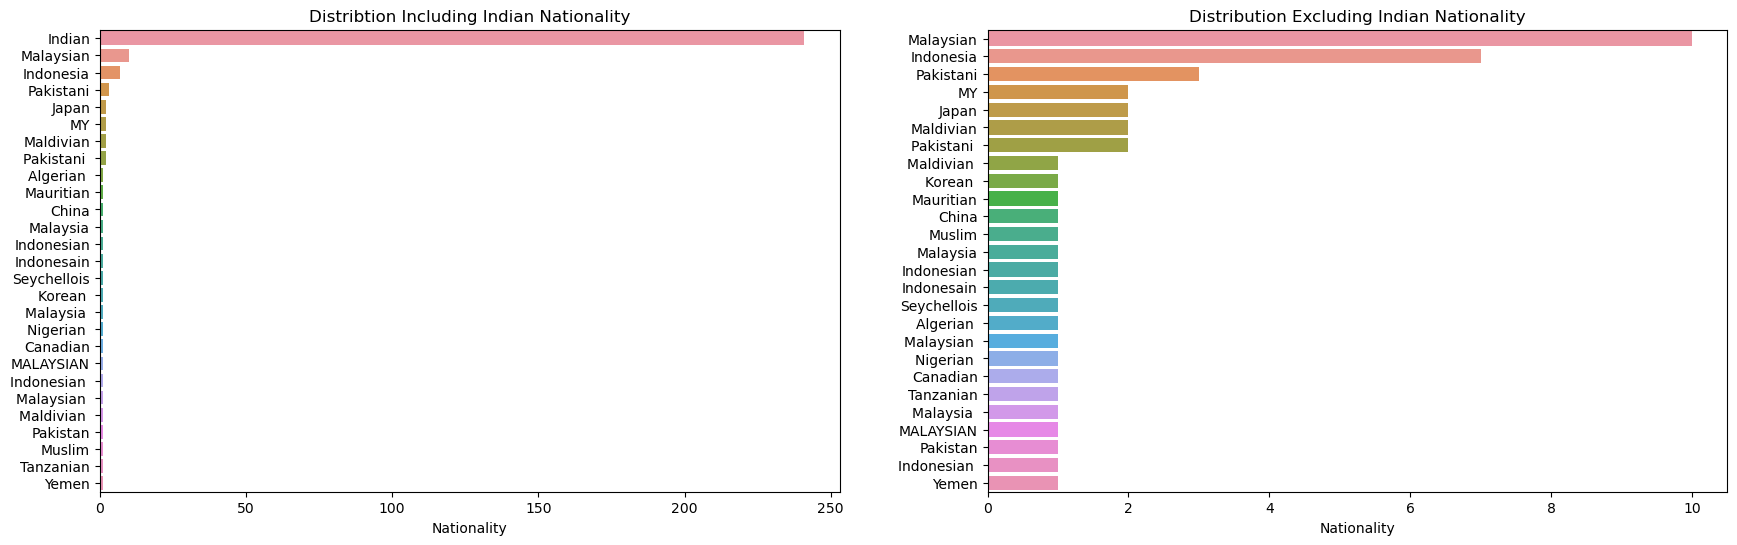

In [33]:
a4_dims = (21, 6)
fig, ax = plt.subplots(1,2,figsize=a4_dims)
ax[0].set(title = 'Distribtion Including Indian Nationality')
ax[1].set(title = 'Distribution Excluding Indian Nationality')
sns.barplot(x = data['Nationality'].value_counts(),y= data['Nationality'].value_counts().index, ax = ax[0])
sns.barplot(x = data['Nationality'][data['Nationality'] != 'Indian'].value_counts(),y= data['Nationality'][data['Nationality'] != 'Indian'].value_counts().index, ax = ax[1])

From the graphs , I deduced that most people in the dataset are from Indian Commmunity so for my basic analysis for the graphs in the next code will show the dataset values focusing on the Indian Community only.

In [34]:
rowsWithIndianNationality = float(data['Nationality'][data['Nationality'] == "Indian"].value_counts())
totalRows = float(data['Nationality'].value_counts().sum())
perc = (rowsWithIndianNationality)/(totalRows)*100

print("The % of data belonging to Indian Nationality is:", perc,"%") 

The % of data belonging to Indian Nationality is: 83.68055555555556 %


Since 84% of our data belongs to Indian Nationality , I'm going to focus my research and analysis pertainning to the Indian Community.

<Axes: title={'center': 'Distribution of Dessert'}, xlabel='Dessert'>

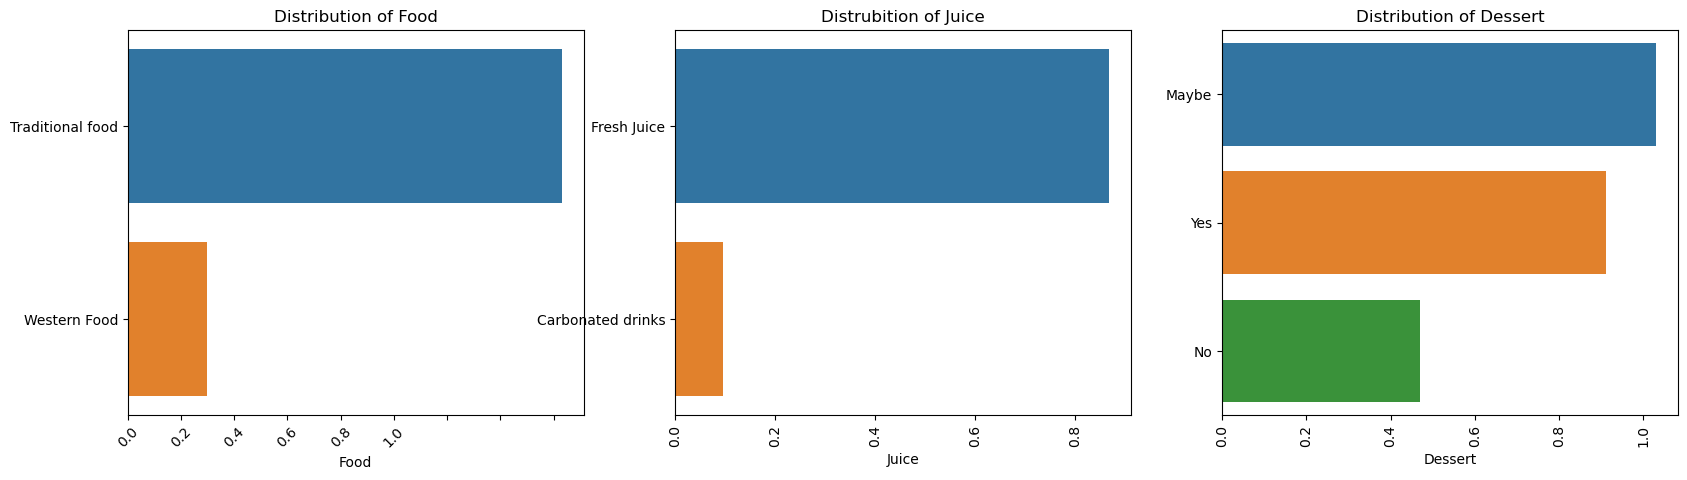

In [35]:
dims = (20, 5)
fig, ax = plt.subplots(1,3,figsize=dims)
ax[0].set(title = 'Distribution of Food')
ax[1].set(title = 'Distrubition of Juice')
ax[2].set(title = 'Distribution of Dessert')
ax[0].set_xticklabels(ax[0].get_yticklabels(), rotation=45)
ax[1].set_xticklabels(ax[1].get_yticklabels(), rotation=90)
ax[2].set_xticklabels(ax[2].get_yticklabels(), rotation=90)
sns.barplot(x = data[data['Nationality'] == "Indian"].Food.value_counts(), y = data.Food.value_counts().index, ax = ax[0])
sns.barplot(x = data[data['Nationality'] == "Indian"].Juice.value_counts(), y = data.Juice.value_counts().index, ax = ax[1])
sns.barplot(x = data[data['Nationality'] == "Indian"].Dessert.value_counts(), y = data.Dessert.value_counts().index, ax = ax[2])

The 3 simple bar graphs above shows the distrubution of Food, Juice and Dessert among the Indian Ethnicity

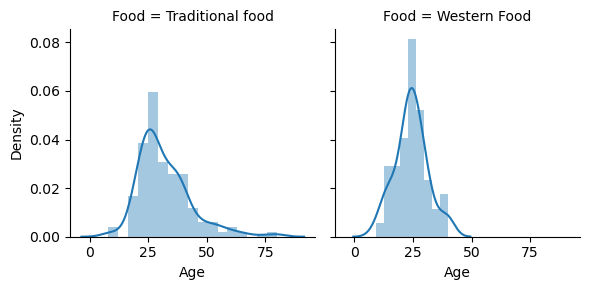

In [36]:
g = sns.FacetGrid(preference_df, col="Food") 
g.map(sns.distplot, "Age")
plt.show()

The 2 graphs above showcases the relationship between age of the and preference of Western/Traditional Food . From the graph , I can infer that most people in this dataset are 25-30 years . I can also see that, generally , more people prefer Western Food . I can also see that people who are of older age prefers Traditional Food wheread those who are from 50 to 75 years of age did not indicate any liking towards Western Food , as seen in the 2nd graph.

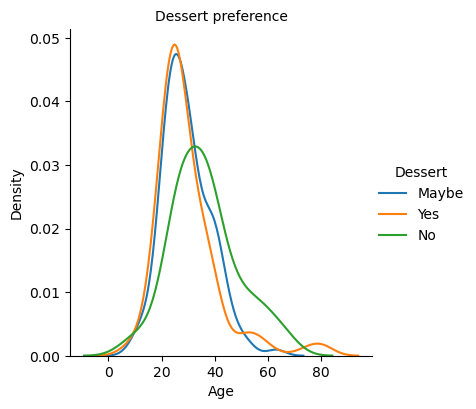

In [37]:
sns.FacetGrid(preference_df, hue="Dessert", height=4) \
   .map(sns.kdeplot, "Age") \
   .add_legend()
plt.title("Dessert preference",size=10)
plt.show()

The graph above shows the relationship between age and peference of dessert. Generally people who are younger ( from 20 to 30 years) prefer to eat dessert.

<Axes: title={'center': 'Females Only (Dessert Choice vs Age)'}, xlabel='Dessert', ylabel='Age'>

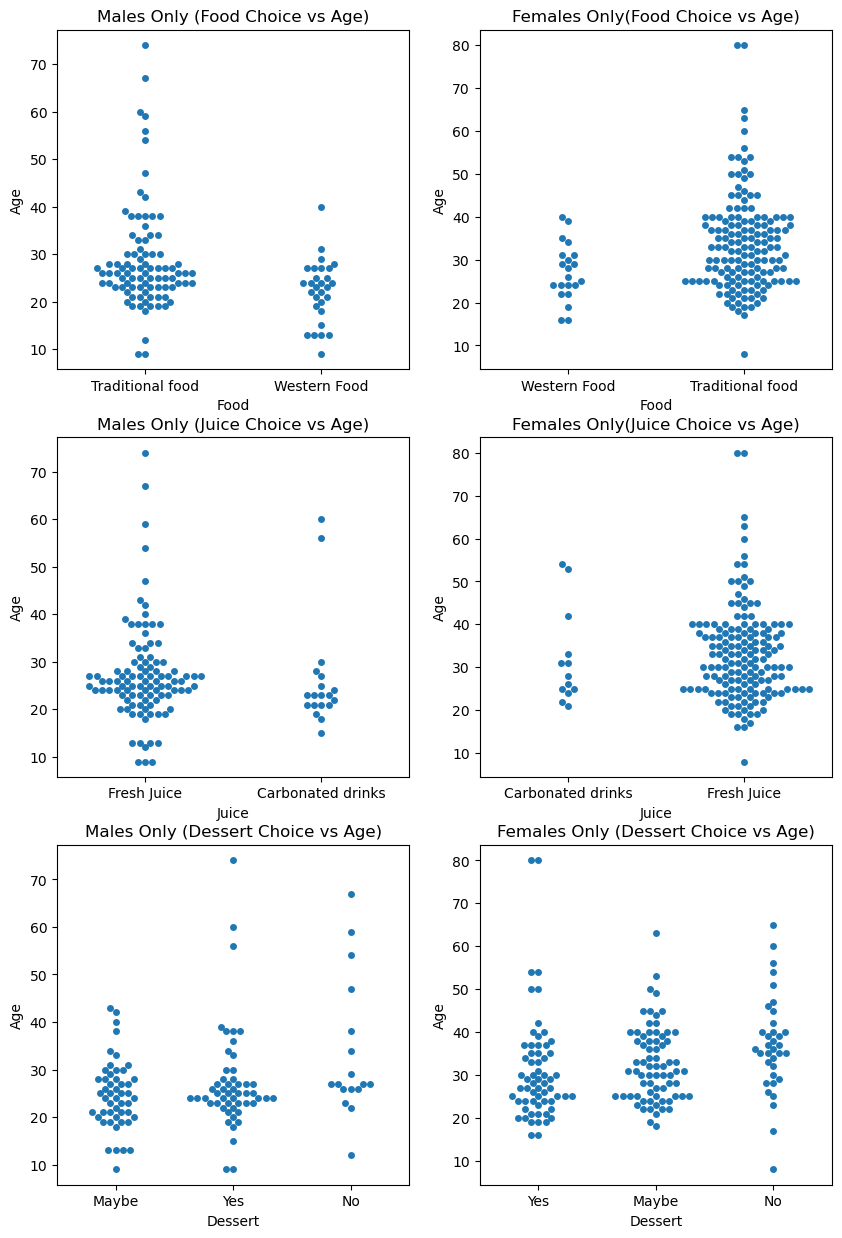

In [38]:
dims = (10, 15)
fig, ax = plt.subplots(3,2,figsize=dims)
ax[0][0].set(title = 'Males Only (Food Choice vs Age)')
ax[0][1].set(title = 'Females Only(Food Choice vs Age)')

sns.swarmplot(y = data['Age'][data.Gender == 'Male'], x = data['Food'][data.Gender == 'Male'], ax = ax[0][0])
sns.swarmplot(y = data['Age'][data.Gender == 'Female'], x = data['Food'][data.Gender == 'Female'], ax = ax[0][1])

ax[1][0].set(title = 'Males Only (Juice Choice vs Age)')
ax[1][1].set(title = 'Females Only(Juice Choice vs Age)')

sns.swarmplot(y = data['Age'][data.Gender == 'Male'], x = data['Juice'][data.Gender == 'Male'], ax = ax[1][0])
sns.swarmplot(y = data['Age'][data.Gender == 'Female'], x = data['Juice'][data.Gender == 'Female'], ax = ax[1][1])

ax[2][0].set(title = 'Males Only (Dessert Choice vs Age)')
ax[2][1].set(title = 'Females Only (Dessert Choice vs Age)')

sns.swarmplot(y = data['Age'][data.Gender == 'Male'], x = data['Dessert'][data.Gender == 'Male'], ax = ax[2][0])
sns.swarmplot(y = data['Age'][data.Gender == 'Female'], x = data['Dessert'][data.Gender == 'Female'], ax = ax[2][1])

The six graphs above depict clearly the relationship between preferences of types of food,drinks and desserts with respect to age and gender.

Some conclusions that can be drawn from each graphs:

1) Graph 1 : Generally more men prefer Traditional Food rather than Western Food. Most males in the dataset are in their 20s to 40s.
2) Graph 2 : Generally more % of women prefer Traditional Food rather than Western Food. Most females in the dataset are in their 20s to 40s.
3) Graph 3:  Generally more men prefer Fresh Juice rather than Carbonated Drinks. Most males in the dataset are in their 20s to 40s.
4) Graph 4:  Generally more women prefer Fresh Juice rather than Carbonated Drinks. Most females in the dataset are in their 20s to 40s.
5) Graph 5 : Most men either said they might or want to try dessert compared to men who did not want to try dessert at all.Most males in the dataset are in their 20s to 40s.
6) Graph 6 : Most women either said they might or want to try dessert compared to women who did not want to try dessert at all.Most females in the dataset are in their 20s to 40s.

<Axes: title={'center': 'Dessert Choice vs Age'}, xlabel='Dessert', ylabel='Age'>

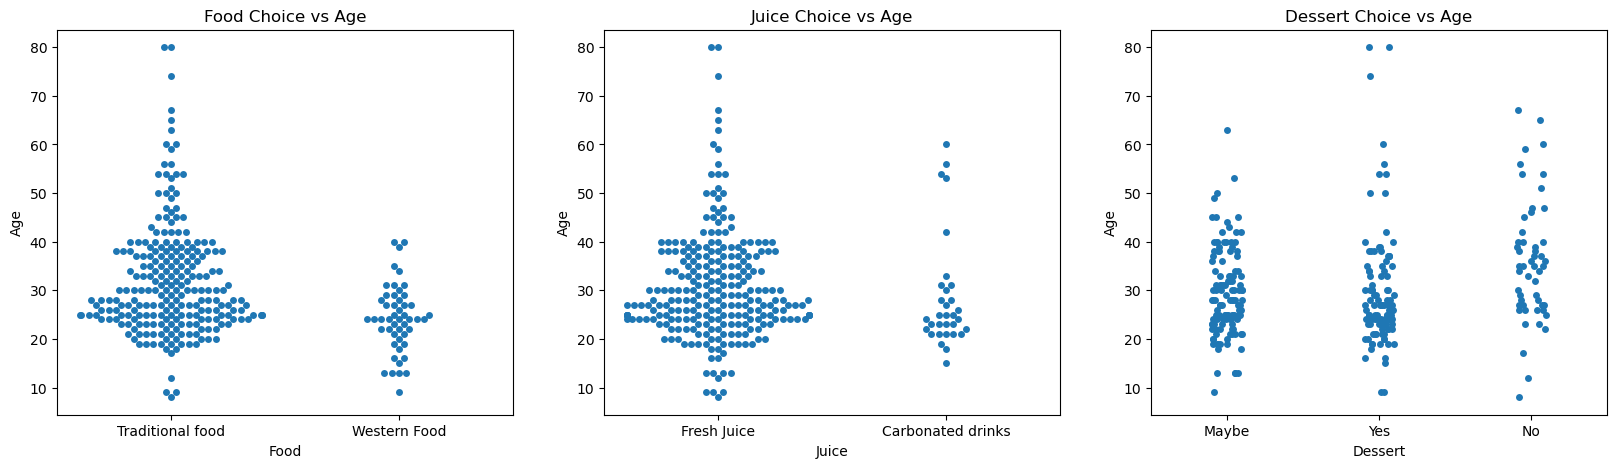

In [39]:
dims = (20, 5)
fig, ax = plt.subplots(1,3,figsize=dims)

ax[0].set(title = 'Food Choice vs Age')
sns.swarmplot(y = data['Age'], x = data['Food'], ax = ax[0])

ax[1].set(title = 'Juice Choice vs Age')
sns.swarmplot(y = data['Age'], x = data['Juice'], ax = ax[1])

ax[2].set(title = 'Dessert Choice vs Age')
sns.stripplot(y = data['Age'], x = data['Dessert'], ax = ax[2]) 

I also created 3 simple graphs to represent the clear relationship between age and the preferences for each category.

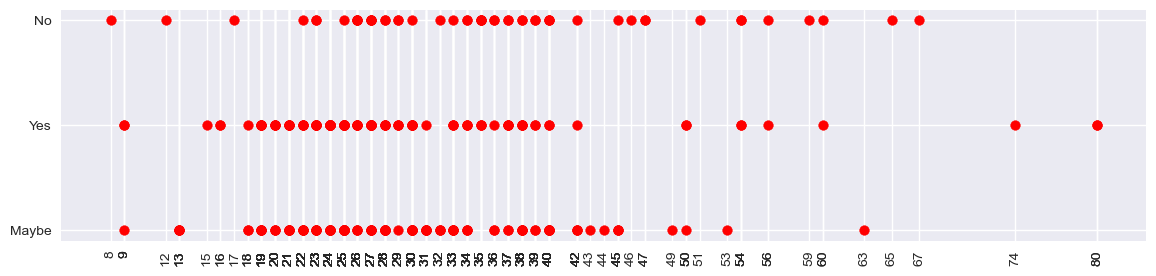

In [40]:
plt.style.use('seaborn')
plt.figure(figsize = (14,3))

plt.scatter(preference_df.Age,preference_df.Dessert,c='r')
plt.xticks(preference_df.Age,rotation = 90)
plt.show() 

The graph above shows specifically the preference of desser for all the ages of people used in the dataset.

In [41]:
import plotly.express as px
fig = px.sunburst(preference_df, path=['Gender', 'Food'], values='Age',)
fig.show()

In [42]:
import plotly.express as px
fig = px.sunburst(preference_df, path=['Gender', 'Dessert'], values='Age',)
fig.show()

In [43]:
import plotly.express as px
fig = px.sunburst(preference_df, path=['Gender', 'Juice'], values='Age',)
fig.show()

Some final conclusions from the 3 digrams above :

1) Both Males and Females prefer Traditional Food over Western Food , although more females than males prefer Traditional Food.
2) Both Males and Females prefer to have dessert(Yes) with more women preferring to have dessert.
3) Both Males and Females prefer to have Fresh Juice over Carbonated Drinks.

### References:

[1] Food Nutrition Datset, https://www.kaggle.com/datasets/niharika41298/nutrition-details-for-most-common-foods. Author: Niharika

[2] Food Preference Dataset, https://www.kaggle.com/datasets/vijayashreer/food-preferences Author: Vijayashreer

[3] Bar Graph Coding , https://plotly.com/python/bar-charts/#colored-bars Author: 2023 Plotly

[4] Pie Chart for Food Nutrition , https://plotly.com/python/pie-charts/ Author: 2023 Plotly